#### Hi all.  🙋

#### Nice to meet you! 

#### We all know that feature engineering is the key to dynamically growing a model's performance in machine learning.

#### You will try a lot of thought and various methods when doing feature engineering! I'm going to suggest a lot of ways to reduce the trouble and process.

#### The methods I will introduce are both known and unfamiliar methods. I hope you will refer to them when conducting competitions on Kaggle in the future! 💯



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
train = train.drop(['Id'],axis =1)
pd.set_option('display.max_columns', None)
train.head()

In [ ]:
# data segmentation
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0) # train, valid 8:2 분할

In [ ]:
# We need to duplicate the original state of our training data and test data.
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()

# Functions that return training data and test data
def load_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()
    return train_x, test_x

In [ ]:
# Store the numeric variable to be converted into a list
num_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
            'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF',
           'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF']

# Linear Transform

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Standardization</center></h1>
</div>

#### This is the most basic transformation method. 
#### It is a method that makes the mean 0 and the standard deviation 1 through a linear transformation!

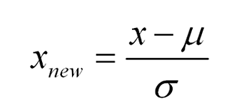

In [ ]:
# Load Data
train_x, test_x = load_data()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(train_x[num_cols])

In [ ]:
# Permuting each column after normalization
train_x[num_cols] = scaler.transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])

<div style="background-color:red;border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">BAD Standardization</center></h1>
</div>

#### In this method, training data and test data are transformed according to the mean and standard deviation of different criteria. 

#### If the distribution of each data does not differ significantly from each other, it is not a problem. However, this method should not be used. 💥

In [ ]:
train_x, test_x = load_data()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalize training data and test data respectively (bad example)
scaler_train = StandardScaler()
scaler_train.fit(train_x[num_cols])
train_x[num_cols] = scaler_train.transform(train_x[num_cols])

scaler_test = StandardScaler()
scaler_test.fit(test_x[num_cols])
test_x[num_cols] = scaler_test.transform(test_x[num_cols])

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Min-Max Scaling</center></h1>
</div>

#### This is a Min-Max Scaling method that converts the range taken by the variable value into a specific interval (between 0 and 1).

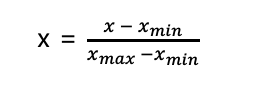

In [ ]:
train_x, test_x = load_data()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x[num_cols])

In [ ]:
train_x[num_cols] = scaler.transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])

In [ ]:
train_x[num_cols].describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['min'], cmap='Reds')\
                            .background_gradient(subset=['max'], cmap='coolwarm')

## The minimum value is 0 and the maximum value is 1.

# Non-linear Transformation

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Log</center></h1>
</div>

#### It is recommended that the distribution of variables is not skewed to one side. 

#### For example, a variable representing a specific amount or number of times tends

#### to have a distribution that is biased in one direction, 

#### so log transformation is sometimes performed. And when the value is 0, 

#### log(x+1) transformation is often used because it cannot take the log as it is.

In [ ]:
train_x, test_x = load_data()

In [ ]:
x = train_x[num_cols]

In [ ]:
# take log
x1 = np.log(x)
x1

In [ ]:
# Add 1 and then take the logarithm
x2 = np.log1p(x)
x2

In [ ]:
# After taking the logarithm of the absolute value, add the original sign
x3 = np.sign(x) * np.log(np.abs(x))
x3

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Box-Cox Transform</center></h1>
</div>

#### In addition to the BOX-COX Transform, which is a generalized log transformation, 

#### there is also the Yeo-Johnson Transform that can be applied to variables with negative values. 
#### These transformations approximate a normal distribution after log transformation.

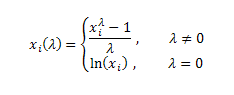

In [ ]:
train_x, test_x = load_data()

In [ ]:
# Storing variables that take only positive integer values ​​as conversion targets in a list
# Also, if missing values ​​are included, be careful because (~(train_x[c] <= 0.0)).all() should be used.
pos_cols = [c for c in num_cols if (train_x[c] > 0.0).all() and (test_x[c] > 0.0).all()]

## List of features with positive values
pos_cols

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt = PowerTransformer(method='box-cox')
pt.fit(train_x[pos_cols])

In [ ]:
# 변환 후의 데이터로 각 열을 치환
train_x[pos_cols] = pt.transform(train_x[pos_cols])
test_x[pos_cols] = pt.transform(test_x[pos_cols])

#### LotArea column before after comparison

In [ ]:
x = train.LotArea.values
sns.kdeplot(x)
plt.title("before Box-Cox-transform")
plt.show()

In [ ]:
x = train_x.LotArea.values
sns.kdeplot(x)
plt.title("after Box-Cox-transform")
plt.show()


## The existing data also has a form of a normal distribution, 
## so there is little difference between it and after the Box-Cox transformation.

#### GrLivArea column before after comparison

In [ ]:
x = train.GrLivArea.values
sns.kdeplot(x)
plt.title("before Box-Cox-transform")
plt.show()

In [ ]:
x = train_x.GrLivArea.values
sns.kdeplot(x)
plt.title("after Box-Cox-transform")
plt.show()


## The existing data also has a form of a normal distribution, 
## so there is little difference between it and after the Box-Cox transformation.

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Yeo-Johnson Transform</center></h1>
</div>

#### Yeo-Johnson transform can also take negative values.

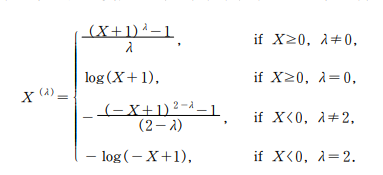

In [ ]:
train_x, test_x = load_data()

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(train_x[num_cols])

In [ ]:
# 변환 후의 데이터로 각 열을 치환
train_x[num_cols] = pt.transform(train_x[num_cols])
test_x[num_cols] = pt.transform(test_x[num_cols])

In [ ]:
train_x[num_cols]

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train.MSSubClass,
    xbins=dict( # bins used for histogram
        start=-100,
        end=200
    ),
    marker_color='blue',
    opacity=1
))

fig.update_layout(
    title_text='MSSubClass yeo-johnson Before',
    xaxis_title_text='MSSubClass',
    yaxis_title_text='Value', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train_x.MSSubClass,
    xbins=dict( # bins used for histogram
        start=0,
        end=200

    ),
    marker_color='blue',
    opacity=1
))

fig.update_layout(
    title_text='MSSubClass yeo-johnson After',
    xaxis_title_text='MSSubClass',
    yaxis_title_text='Value', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()


## The spread distribution was forced to approximate the normal distribution.

# Setting TransForm

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Clipping</center></h1>
</div>

#### Numerical variables sometimes include outliers, but you can exclude outliers 
#### outside a certain range by setting upper and lower limits and replacing values 
#### outside the range with upper and lower limits. It is also a good idea to check the distribution first and then set the threshold.

In [ ]:
train_x, test_x = load_data()

In [ ]:
# Check 1%, 99% points of training data per column
p01 = train_x[num_cols].quantile(0.01)
p99 = train_x[num_cols].quantile(0.99)

p01
p99

In [ ]:
# Values ​​below 1% point are clipped to 1% point, and values ​​above 99% point are clipped to 99% point.
train_x[num_cols] = train_x[num_cols].clip(p01, p99, axis=1)
test_x[num_cols] = test_x[num_cols].clip(p01, p99, axis=1)

#### LotArea column before after comparison

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train.LotArea,
    xbins=dict( # bins used for histogram
        start=0,
        end=50000,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='LotArea Clipping Before',
    xaxis_title_text='LotArea',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train_x.LotArea,
    xbins=dict( # bins used for histogram
        start=0,
        end=50000
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='LotArea Clipping After',
    xaxis_title_text='LotArea',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()


## Values ​​from 0 to 80 are substituted.

#### RestingBP column before after comparison

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train.GrLivArea,
    xbins=dict( # bins used for histogram
        start=0,
        end=10000,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='GrLivArea Clipping Before',
    xaxis_title_text='GrLivArea',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train_x.GrLivArea,
    xbins=dict( # bins used for histogram
        start=0,
        end=10000,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='GrLivArea Clipping After',
    xaxis_title_text='GrLivArea',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

#### If you look at the graph, you can clearly see that the values ​​are not spread widely but are clustered like a normal distribution.

<div style="background-color:rgba(0, 255, 255, 0.6);border-radius:5px;display:fill;">
    <h1><center style ="margin-left : 20px;">Rank Gauss</center></h1>
</div>

#### This is a method of converting numeric variables into ranks and then semi-forced normal 
#### distributions while maintaining the order. The method used by Kaggle Grandmaster 
#### Michael Jahrer was revealed in the 1st solution in Porto Seguro's Safe Driver Prediction competition. 
#### In particular, it is said to have better performance than general standardization as a transformation when building a model in a neural network.

In [ ]:
train_x, test_x = load_data()

from sklearn.preprocessing import QuantileTransformer

In [ ]:
transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
transformer.fit(train_x[num_cols])

In [ ]:
train_x[num_cols] = transformer.transform(train_x[num_cols])
test_x[num_cols] = transformer.transform(test_x[num_cols])

In [ ]:
train_x[num_cols]

In [ ]:
p = sns.boxplot(x=train.GarageArea, color = 'teal')
p.set_title("GarageArea RankGauss Before")
plt.show()

In [ ]:
p = sns.boxplot(x=train_x.GarageArea, color = 'teal')
p.set_title("GarageArea RankGauss After")
plt.show()

#### The values ​​were semi-forced to be normally distributed. The impact of outliers is also expected to decrease.

# NEXT PLAN

#### The following tabular data conversion will deal with numeric conversion of category types. 
#### If you are interested in my kernel, please find the next category type conversion kernel as well.